In [1]:
url= 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [2]:
import os

In [3]:
os.path.basename(url)

'housing.tgz'

In [4]:
file_path=r"c:\\Users\\pc\\Desktop\\Machine Learning\\Housing-Prediction\config"


In [5]:
os.listdir(file_path)[0]

'config.yaml'

In [6]:
import pandas as pd

In [7]:
csv_file_path=r"C:\Users\pc\Desktop\Machine Learning\Housing-Prediction\housing\artifact\data_ingestion\2022-08-22-00-09-19\raw_data\housing.csv"
housing_data_frame=pd.read_csv(csv_file_path)

In [8]:
import matplotlib.pyplot as plt

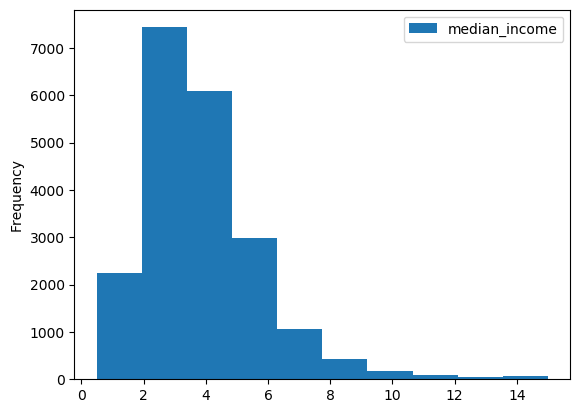

In [9]:
housing_data_frame[["median_income"]].plot(kind="hist")

In [10]:
import numpy as np

In [11]:
housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )

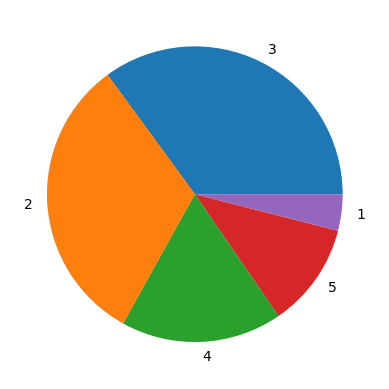

In [12]:
plt.pie(housing_data_frame.income_cat.value_counts(),labels=housing_data_frame.income_cat.value_counts().index)
plt.show()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [15]:
for train_ix,test_ix in split.split(housing_data_frame, housing_data_frame["income_cat"]):
    print(train_ix,test_ix)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [16]:
train_df=housing_data_frame.loc[train_ix]

In [17]:
housing_data_frame.shape

(20640, 11)

In [18]:
train_df.shape

(16512, 11)

In [19]:
test_df=housing_data_frame.loc[test_ix]

In [20]:
test_df.shape

(4128, 11)

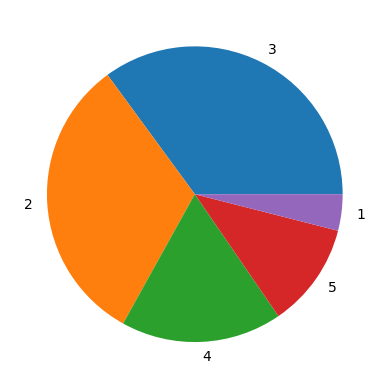

In [21]:
plt.pie(train_df.income_cat.value_counts(),labels=train_df.income_cat.value_counts().index)
plt.show()

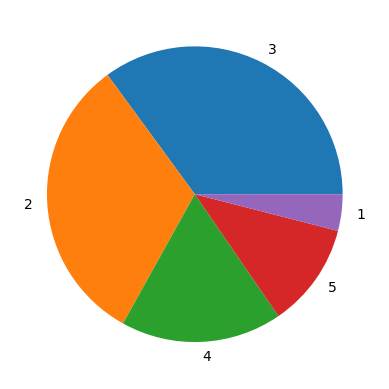

In [22]:
plt.pie(test_df.income_cat.value_counts(),labels=test_df.income_cat.value_counts().index)
plt.show()

In [23]:
housing_data_frame.dtypes.index,housing_data_frame.dtypes.values

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 array([dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
       dtype=object))

In [24]:
data_type = list(map(lambda x:str(x).replace("dtype('","").replace("')","") ,housing_data_frame.dtypes.values))

In [25]:
column=housing_data_frame.columns

In [26]:
dict(zip(column,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}